<a href="https://colab.research.google.com/github/pedrohortencio/data-analysis-projects/blob/main/NYC%20Parking%20Violations/NYC_Parking_Violations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Full violations data from NYC Open Data](https://data.cityofnewyork.us/City-Government/Parking-Violations-Issued-Fiscal-Year-2021/pvqr-7yc4)

[Raw .csv data (subset of 50,000 rows)](https://raw.githubusercontent.com/pedrohortencio/data-analysis-projects/main/NYC%20Parking%20Violations/violations.csv)


[Original project](https://towardsdatascience.com/learn-python-data-analytics-by-example-ny-parking-violations-e1ce1847fa2)

### Importing the data file

In [73]:
import pandas as pd
import numpy as np

In [ ]:
url = 'https://raw.githubusercontent.com/pedrohortencio/data-analysis-projects/main/NYC%20Parking%20Violations/violations.csv'

# Importing .csv from the URL
df = pd.read_csv(url)
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,NY,PAS,11/12/2020,36,4DSD,BMW,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0637P,NaN,BK,NaN,NaN,WB ATLANTIC AVE @ SH,EPHERD AVE,0,1180,B,T,NaN,NaN,NaN,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
1,8793684599,L5232HY,TN,PAS,09/14/2020,21,TRAC,INTER,T,60790,31140,31190,20200888,101.0,101,101,367421,T402,N,0853A,NaN,Q,O,4212,Rockaway Beach Blvd,NaN,0,408,D1,NaN,Y,0830A,1000A,WHITE,NaN,0,NaN,0,W,NaN,NaN,NaN,NaN
2,8864757053,BPMN76,FL,PAS,11/25/2020,20,SUBN,NISSA,T,36030,31190,10610,20200688,28.0,28,28,367911,T103,FF,0853A,NaN,NY,F,130,W 113th St,NaN,0,408,d,NaN,YYYYYYY,NaN,NaN,BLACK,NaN,0,NaN,0,49,20A-No Parking (Non-COM),NaN,NaN,NaN
3,8778326047,57387MJ,NY,COM,08/20/2020,38,VAN,NaN,T,34430,10410,13610,20211231,13.0,13,13,368567,T506,X,0444P,NaN,NY,F,4,W 33rd St,NaN,0,408,I3,NaN,YYYYY,0700A,0700P,WH,NaN,2016,NaN,0,01,NaN,NaN,NaN,NaN
4,4706640702,M81KFJ,NJ,PAS,09/09/2020,36,UT,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0723A,NaN,BK,NaN,NaN,WB FOSTER AVE @ E 18,TH ST,0,1180,B,T,NaN,NaN,NaN,NaN,NaN,2002,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN


In [ ]:
rows, columns = df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 50000
Number of columns: 43


### Changing the 'Issue Date' column to a date format.

In [ ]:
df['Issue Date'].dtype
# The 'Issue Data' is in a MM/DD/YYYY format,
# but pandas is treating it like a general object dtype

dtype('O')

In [ ]:
# To fix this, a simple method is to use .to_datetime
df['Issue Date'] = pd.to_datetime(df['Issue Date'])
df['Issue Date'].dtype

dtype('<M8[ns]')

In [ ]:
# Let's take a look
df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,4714702166,KGK6659,NY,PAS,2020-11-12,36,4DSD,BMW,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0637P,NaN,BK,NaN,NaN,WB ATLANTIC AVE @ SH,EPHERD AVE,0,1180,B,T,NaN,NaN,NaN,GY,NaN,2007,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN
1,8793684599,L5232HY,TN,PAS,2020-09-14,21,TRAC,INTER,T,60790,31140,31190,20200888,101.0,101,101,367421,T402,N,0853A,NaN,Q,O,4212,Rockaway Beach Blvd,NaN,0,408,D1,NaN,Y,0830A,1000A,WHITE,NaN,0,NaN,0,W,NaN,NaN,NaN,NaN
2,8864757053,BPMN76,FL,PAS,2020-11-25,20,SUBN,NISSA,T,36030,31190,10610,20200688,28.0,28,28,367911,T103,FF,0853A,NaN,NY,F,130,W 113th St,NaN,0,408,d,NaN,YYYYYYY,NaN,NaN,BLACK,NaN,0,NaN,0,49,20A-No Parking (Non-COM),NaN,NaN,NaN
3,8778326047,57387MJ,NY,COM,2020-08-20,38,VAN,NaN,T,34430,10410,13610,20211231,13.0,13,13,368567,T506,X,0444P,NaN,NY,F,4,W 33rd St,NaN,0,408,I3,NaN,YYYYY,0700A,0700P,WH,NaN,2016,NaN,0,01,NaN,NaN,NaN,NaN
4,4706640702,M81KFJ,NJ,PAS,2020-09-09,36,UT,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0723A,NaN,BK,NaN,NaN,WB FOSTER AVE @ E 18,TH ST,0,1180,B,T,NaN,NaN,NaN,NaN,NaN,2002,NaN,0,NaN,PHTO SCHOOL ZN SPEED VIOLATION,NaN,NaN,NaN


### Searching for invalid data

In [ ]:
# Searching for missing values
df.isna().sum()

Summons Number                           0
Plate ID                                 0
Registration State                       0
Plate Type                               0
Issue Date                               0
Violation Code                           0
Vehicle Body Type                      145
Vehicle Make                           136
Issuing Agency                           0
Street Code1                             0
Street Code2                             0
Street Code3                             0
Vehicle Expiration Date                  0
Violation Location                   17893
Violation Precinct                       0
Issuer Precinct                          0
Issuer Code                              0
Issuer Command                       17857
Issuer Squad                         17857
Violation Time                           1
Time First Observed                  48111
Violation County                       117
Violation In Front Of Or Opposite    18068
House Numbe

There are a bunch of columns with huge number of NaN entries.

```No Standing or Stopping Violation```, ```Hydrant Violation ``` and ```Double Parking Violation``` have all rows with NaN values.

```Meter Number```, ```Unregistered Vehicle? ``` and ```Time First Observed``` have over 47k rows with missing values.

```Violation Legal Code ```, ```From Hours In Effect  ``` and ```To Hours In Effect ``` have over 30k rows with missing values.

As most of these problematic columns aren't useful for my analysis, I'll drop all of them and those I don't consider useful right now.

In [ ]:
columns_to_keep = ['Summons Number', 'Violation Code', 'Vehicle Make',
                   'Issue Date', 'Plate Type', 'Vehicle Year',
                   'Violation Time', 'Registration State']

df.drop(df.columns.difference(columns_to_keep), 1, inplace=True)

df.head()

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Make,Violation Time,Vehicle Year
0,4714702166,NY,PAS,2020-11-12,36,BMW,0637P,2007
1,8793684599,TN,PAS,2020-09-14,21,INTER,0853A,0
2,8864757053,FL,PAS,2020-11-25,20,NISSA,0853A,0
3,8778326047,NY,COM,2020-08-20,38,NaN,0444P,2016
4,4706640702,NJ,PAS,2020-09-09,36,TOYOT,0723A,2002


In [ ]:
# Checking missing values again:
df.isna().sum()

Summons Number          0
Registration State      0
Plate Type              0
Issue Date              0
Violation Code          0
Vehicle Make          136
Violation Time          1
Vehicle Year            0
dtype: int64

In [ ]:
# Inspecting the 'Registration State' column
df["Registration State"].unique()
# The '99' entry doesn't mean anything and it's possible a missing value.

array(['NY', 'TN', 'FL', 'NJ', 'MA', 'PA', 'MD', 'CT', 'TX', 'CA', 'IL',
       'IN', 'OR', 'AZ', 'QB', 'WA', 'GA', 'CO', 'GV', 'NC', 'ME', 'DE',
       'VA', 'MN', '99', 'WV', 'OH', 'NH', 'AR', 'DC', 'SC', 'NV', 'SD',
       'RI', 'MO', 'LA', 'NM', 'OK', 'AL', 'IA', 'MT', 'MI', 'NE', 'ID',
       'KY', 'VT', 'WI', 'MS', 'ON', 'HI', 'KS', 'UT', 'AK', 'FO', 'PR',
       'DP', 'WY', 'AB', 'ND'], dtype=object)

In [ ]:
# Examining the rows where "Registration State" is 99 we can see that the "Plate Type"
# also has a missing value entry: '999'
df[df['Registration State'] == "99"]

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Make,Violation Time,Vehicle Year
450,8558998905,99,999,2020-09-08,20,FORD,0258P,0
8177,1473591405,99,999,2020-10-06,74,HONDA,0123P,2009
8371,1473889406,99,999,2020-07-22,70,MITSU,1050P,2008
9097,1478640340,99,999,2020-08-04,21,INTER,0839A,0
10194,1478349232,99,COM,2020-08-29,21,FORD,0820A,2010
...,...,...,...,...,...,...,...,...
47496,1477643310,99,999,2020-07-11,51,HONDA,0955A,0
48018,1474455141,99,PAS,2020-10-11,14,CHEVR,1240A,2014
49639,1479532290,99,PAS,2020-09-03,21,TOYOT,0904A,0
49653,1472860378,99,PAS,2020-07-15,17,CHEVR,0825A,0


In [ ]:
# Let's discart these rows, along with the ones that have some column with NaN value:

df = df[(df['Registration State'] != "99") 
    & (df['Plate Type'] != "999")
    & (df['Vehicle Make'].notnull()) 
    & (df['Violation Time'].notnull())]

In [ ]:
# Sanity check
df[df['Registration State'] == "99"]

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Make,Violation Time,Vehicle Year


Let's see if there are wrong dates in the "Issue Date" column

In [ ]:
# Dates before 04/01/2020 (beggining of the fiscal year)
df[df["Issue Date"] <= '2020-04-01']

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Make,Violation Time,Vehicle Year
5478,1434778198,NY,PAS,2019-12-13,17,MITSU,0743A,2006
38476,1479597715,NY,PAS,2010-10-22,19,BMW,0354P,2019
39623,1476478417,NY,PAS,2020-02-26,20,BMW,0939A,2007


In [ ]:
# Dates after 11/30/2020 (the end of the fiscal year)
df[df["Issue Date"] >= '2020-11-30']

,Summons Number,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Make,Violation Time,Vehicle Year
26544,1477685066,NY,PAS,2030-08-06,21,TOYOT,0954A,2014
29120,1479952205,NY,PAS,2021-11-04,21,CHEVR,1123A,0
29947,1480015891,NY,PAS,2022-10-20,21,SUBAR,1206P,2014
48186,1476825312,NY,PAS,2026-09-16,21,HONDA,0739A,2003


In [ ]:
# Let's discard these rows:

df = df[(df['Issue Date'] >= '2020-04-01') 
        & (df['Issue Date'] <= '2020-11-30')]

Dealing with the other two columns

In [ ]:
# "Violation Code"

df['Violation Code'].unique()
# it looks alright

array([36, 21, 20, 74, 38, 14,  7, 40, 31, 16, 50, 69, 68, 17, 46, 84, 19,
       42,  5, 37, 33, 10, 78, 70, 51, 47, 82, 66, 61, 98, 53, 94, 71,  8,
       41, 45, 72, 99, 12, 18, 77,  9, 48, 83, 22, 67, 39, 85, 76, 13, 52,
       60,  6, 24, 75, 64, 11, 73,  4, 87, 54, 35, 56, 62, 27, 96, 91, 44,
       26, 49, 89, 80, 95, 79, 63,  1, 59])

In [ ]:
# "Vehicle Year"
df['Vehicle Year'].unique()
# definitely numbers like 0 and bigger than 2020 shouldn't be here

array([2007,    0, 2002, 2017, 2008, 2016, 2018, 2006, 2019, 2013, 2004,
       2005, 2010, 2020, 1997, 2012, 2009, 2015, 2014, 2011, 2003, 2021,
       2001, 1991, 1998, 1995, 1999, 1994, 1990, 1992, 1989, 1993, 1996,
       1985, 2054, 1977, 1988, 1978, 1987, 2066, 1984, 1986, 1976, 1982,
       1983, 2069, 1979, 2062])

In [ ]:
df = df[(df['Vehicle Year'] != 0) 
    & (df['Vehicle Year'] <= 2020)]

In [ ]:
rows, columns = df.shape

print("After data processing")
print("Rows:", rows)
print("Columns:", columns)

After data processing
Rows: 38937
Columns: 8


11063 rows were discarted.

###Plotting

In [77]:
violations_by_vehicle_year = df.groupby('Vehicle Year')['Summons Number'].count()

In [91]:
violations_by_vehicle_year

Vehicle Year
1976       1
1977       1
1978       1
1979       1
1982       3
1983       2
1984       4
1985       7
1986       5
1987       8
1988      10
1989      10
1990       9
1991      13
1992      24
1993      18
1994      21
1995      76
1996      43
1997     144
1998     124
1999     157
2001     349
2002     440
2003     654
2004     832
2005     997
2006    1185
2007    1388
2008    1354
2009    1105
2010    1207
2011    1456
2012    1626
2013    1880
2014    1946
2015    2658
2016    2841
2017    3575
2018    4106
2019    5064
2020    3592
Name: Summons Number, dtype: int64

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

A plot that shows the number of parking violations issued for each vehicle year:

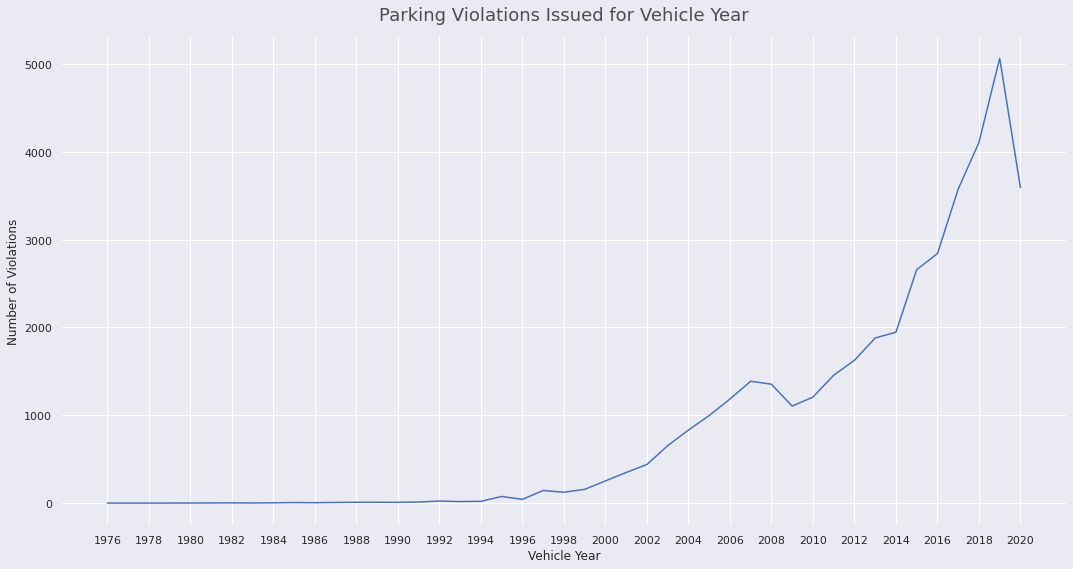

In [112]:
fig = plt.figure(figsize=(18, 9))
fig.patch.set_facecolor('#eaeaf2')
plt.box(False)

ax = sns.lineplot(x=violations_by_vehicle_year.index, y=violations_by_vehicle_year.values)


#years = [1976, 1980, 1985, 1990, 1995, 2000, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020]
#years = [1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
years = [x for x in range(1976, 2021, 2)]

ax.set_xticks(years)
ax.set(xlabel='Vehicle Year', ylabel='Number of Violations')

plt.title('Parking Violations Issued for Vehicle Year',
          size=18, alpha=0.8, y=1.02)

plt.show();

Top 5 violation codes

In [123]:
top_5_violations = df.groupby('Violation Code')['Summons Number'].count().nlargest(5)
display(top_5_violations)

Violation Code
36    14318
21     4319
38     2939
14     2143
20     2013
Name: Summons Number, dtype: int64

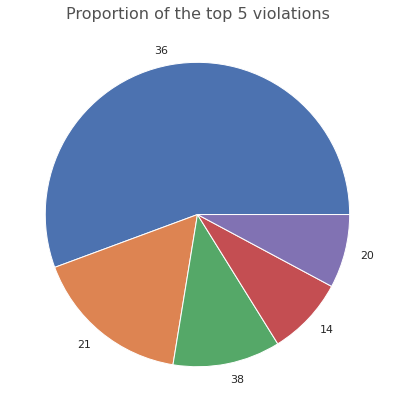

In [127]:
fig = plt.figure(figsize=(15, 7))

ax = top_5_violations.plot.pie()
ax.set(xlabel='', ylabel='')

plt.title('Proportion of the top 5 violations',
          size=16, alpha=0.8);

plt.show();

List the top 5 violation codes for vehicles that are registered in states other than NY.

In [131]:
top_5_no_NY = df[df['Registration State'] != 'NY'].groupby('Violation Code')['Summons Number'].count().nlargest(5)
top_5_no_NY

Violation Code
36    2772
5      365
7      350
12      62
21      30
Name: Summons Number, dtype: int64

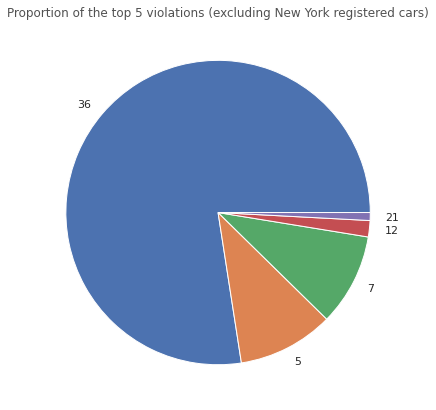

In [132]:
fig = plt.figure(figsize=(15, 7))

ax = top_5_no_NY.plot.pie()
ax.set(xlabel='', ylabel='')

plt.title('Proportion of the top 5 violations (excluding New York registered cars)',
          size=12, alpha=0.8);

plt.show();